# Load Packages and Data

## Loading Packages

In [157]:
# LOAD DATASET
from sklearn.datasets import load_boston

# LOAD ANALYSIS TOOLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Dataset and viewing it

In [107]:
data = load_boston()
features = pd.DataFrame(data.data)
target = pd.DataFrame(data.target)
desc = data.DESCR

features.columns = data.feature_names
target.columns = ['MEDV']

df = features.copy()
df['MEDV'] = target

In [108]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


# Exploratory Analysis

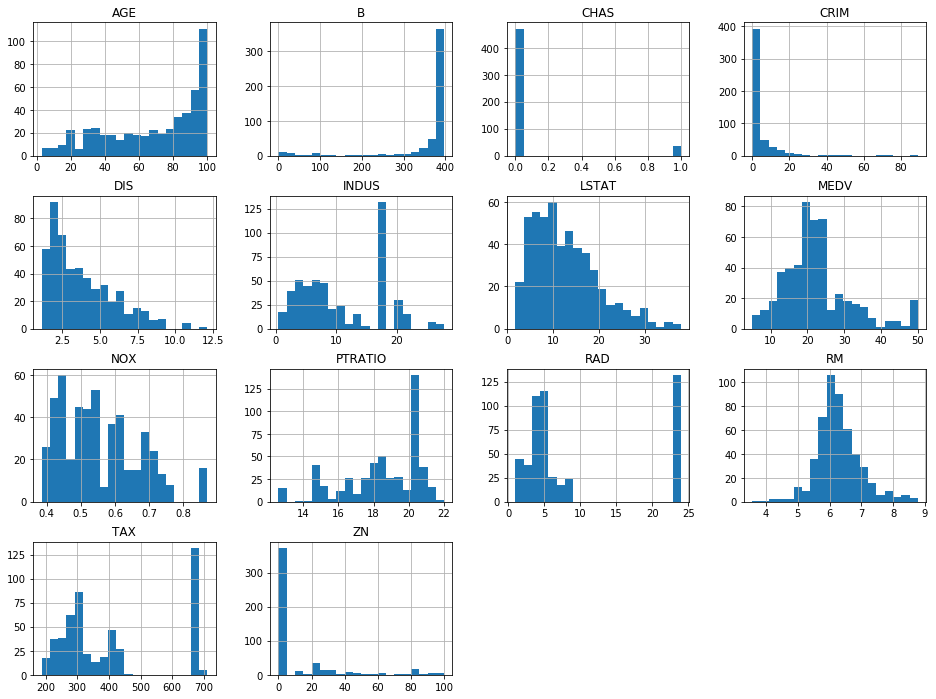

In [158]:
df.hist(figsize = (16, 12), bins = 20)
plt.show()

## Crime Rate

In [19]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.CRIM.isnull().sum(), df.CRIM.mean(), df.CRIM.median(), df.CRIM.max(), df.CRIM.min()))

Nan numbers: 0| Mean: 3.59376071146| Median: 0.25651| Max: 88.9762| Min: 0.00632


In [55]:
df.CRIM.memory_usage() # ALL COLS HAVE THE SAME MEM USAGE

4120

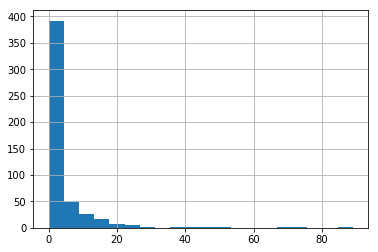

In [160]:
df.CRIM.hist(bins=20) # OUTLIER DETECTED
plt.show()

In [52]:
df.CRIM[df.CRIM.where(df.CRIM > 35).notnull()] # VALUES OVER 35 NEED MORE ATTENTION

380    88.9762
398    38.3518
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
427    37.6619
Name: CRIM, dtype: float64

In [93]:
df[df.CRIM.where(df.CRIM > 35).notnull()] # VALUES OVER 35 NEED MORE ATTENTION

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9


## ZN (Feature)
### proportion of residential land zoned for lots over 25,000 sq.ft.

In [53]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.ZN.isnull().sum(), df.ZN.mean(), df.ZN.median(), df.ZN.max(), df.ZN.min()))

Nan numbers: 0| Mean: 11.3636363636| Median: 0.0| Max: 100.0| Min: 0.0


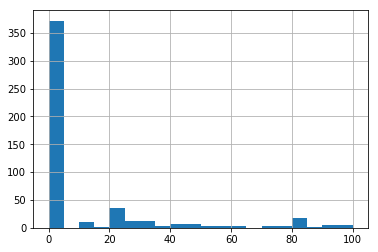

In [161]:
df.ZN.hist(bins=20)
plt.show()

In [60]:
df.ZN[df.ZN.where(df.ZN > 60).notnull()]

39      75.0
40      75.0
54      75.0
55      90.0
56      85.0
57     100.0
65      80.0
66      80.0
195     80.0
196     80.0
197     80.0
198     80.0
199     95.0
200     95.0
201     82.5
202     82.5
203     95.0
204     95.0
254     80.0
255     80.0
256     90.0
283     90.0
284     90.0
286     80.0
290     80.0
291     80.0
292     80.0
298     70.0
299     70.0
300     70.0
347     85.0
348     80.0
353     90.0
354     80.0
355     80.0
Name: ZN, dtype: float64

In [89]:
print(len(df.ZN.nonzero()[0]))

134


## INDUS (Feature)
### proportion of non-retail business acres per town

In [91]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.INDUS.isnull().sum(), df.INDUS.mean(), df.INDUS.median(), df.INDUS.max(), df.INDUS.min()))

Nan numbers: 0| Mean: 11.1367786561| Median: 9.69| Max: 27.74| Min: 0.46


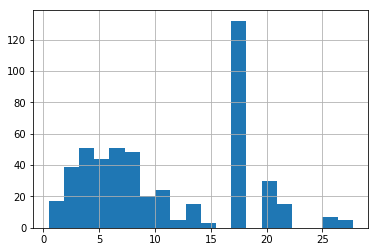

In [162]:
df.INDUS.hist(bins=20)
plt.show()

## CHAS (Feature)
### Charles River dummy variable 
**(= 1 if tract bounds river; 0 otherwise)**

In [174]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.CHAS.isnull().sum(), df.CHAS.mean(), df.CHAS.median(), df.CHAS.max(), df.CHAS.min()))

Nan numbers: 0| Mean: 0.0691699604743| Median: 0.0| Max: 1.0| Min: 0.0


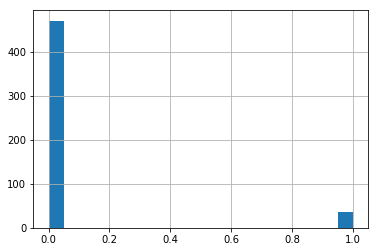

In [166]:
df.CHAS.hist(bins = 20)
plt.show()

In [185]:
df.CHAS[df.CHAS > 0.3].count()

35

## NOX (Feature)
### Nitric oxides concentration 
**(parts per 10 million)**

In [175]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.NOX.isnull().sum(), df.NOX.mean(), df.NOX.median(), df.NOX.max(), df.NOX.min()))

Nan numbers: 0| Mean: 0.554695059289| Median: 0.538| Max: 0.871| Min: 0.385


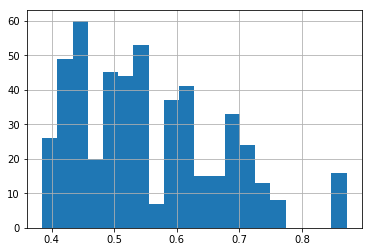

In [176]:
df.NOX.hist(bins = 20)
plt.show()

In [179]:
df.NOX[df.NOX > 0.8].count() # CHECK FOR OUTLIARS

16

## Average number of rooms per dwelling

In [186]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.RM.isnull().sum(), df.RM.mean(), df.RM.median(), df.RM.max(), df.RM.min()))

Nan numbers: 0| Mean: 6.28463438735| Median: 6.2085| Max: 8.78| Min: 3.561


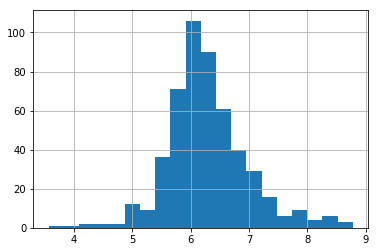

In [188]:
df.RM.hist(bins = 20)
plt.show()

## Proportion of owner-occupied units 
**built prior to 1940**

## Weighted distances to five Boston employment centres

## index of accessibility to radial highways

## full-value property-tax rate per $10,000

## pupil-teacher ratio by town

## 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

## % lower status of the population

## MEDV (Target)
### Median value of owner-occupied homes

In [113]:
print('Nan numbers: {0}| Mean: {1}| Median: {2}| Max: {3}| Min: {4}'
      .format(df.MEDV.isnull().sum(), df.MEDV.mean(), df.MEDV.median(), df.MEDV.max(), df.MEDV.min()))

Nan numbers: 0| Mean: 22.5328063241| Median: 21.2| Max: 50.0| Min: 5.0


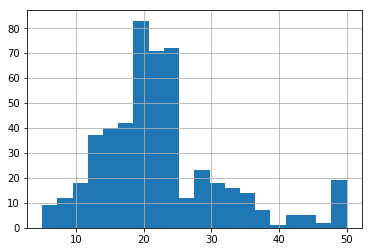

In [163]:
df.MEDV.hist(bins = 20)
plt.show()

**CRIM**

In [145]:
# PRICE WHERE CRIM IS HIGH
print('MEDV[CRIM] HIGH | Min: {0} \t| Max: {1}'.format(df.MEDV[df.CRIM.where(df.CRIM > 35).notnull()].min(), df.MEDV[df.CRIM.where(df.CRIM > 35).notnull()].max()))
# THIS MEANS THAT HIGH CRIM HAS LOWER HOUSE PRICES

# PRICE WHERE CRIM IS LOW
print('MEDV[CRIM] LOW  | Min: {0} \t| Max: {1}'.format(df.MEDV[df.CRIM.where(df.CRIM < 35).notnull()].min(), df.MEDV[df.CRIM.where(df.CRIM < 35).notnull()].max()))
# THIS MEANS THAT LOW CRIM MAY HAVE LOW OR HIGH HOUSE PRICE

# CRIM WHERE PRICE IS HIGH
print('CRIM[MEDV] HIGH | Min: {0} \t| Max: {1}'.format(df.CRIM[df.MEDV.where(df.MEDV > 40).notnull()].min(), df.CRIM[df.MEDV.where(df.MEDV > 40).notnull()].max()))

# CRIM WHERE PRICE IS LOW
print('CRIM[MEDV] LOW  | Min: {0} \t| Max: {1}'.format(df.CRIM[df.MEDV.where(df.MEDV < 35).notnull()].min(), df.CRIM[df.MEDV.where(df.MEDV < 35).notnull()].max()))
# ALL HIGH VALUES HOUSES HAVE LOWER CRIM RATE, LESS THAN 10

# IT WILL BE SEEN IN CORR PLOT

MEDV[CRIM] HIGH | Min: 5.0 	| Max: 15.0
MEDV[CRIM] LOW  | Min: 5.6 	| Max: 50.0
CRIM[MEDV] HIGH | Min: 0.01381 	| Max: 9.2323
CRIM[MEDV] LOW  | Min: 0.00632 	| Max: 88.9762


**CHAS**

In [173]:
print('MEDV[CHAS] HIGH\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.CHAS > 0.3].min(), df.MEDV[df.CHAS > 0.3].max()))

print('MEDV[CHAS] LOW\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.CHAS < 0.3].min(), df.MEDV[df.CHAS < 0.3].max()))

print('CHAS[MEDV] HIGH\t| Min: {0}\t| Max: {1}'.format(df.CHAS[df.MEDV > 40].min(), df.CHAS[df.MEDV > 40].max()))

print('CHAS[MEDV] LOW\t| Min: {0}\t| Max: {1}'.format(df.CHAS[df.MEDV < 40].min(), df.CHAS[df.MEDV < 40].max()))

# CHAS HAS NO GOOD CORR WITH THE TARGET

MEDV[CHAS] HIGH	| Min: 13.4	| Max: 50.0
MEDV[CHAS] LOW	| Min: 5.0	| Max: 50.0
CHAS[MEDV] HIGH	| Min: 0.0	| Max: 1.0
CHAS[MEDV] LOW	| Min: 0.0	| Max: 1.0


**NOX**

In [184]:
print('MEDV[NOX] HIGH\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.NOX > 0.8].min(), df.MEDV[df.NOX > 0.8].max()))

print('MEDV[NOX] LOW\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.NOX < 0.8].min(), df.MEDV[df.NOX < 0.8].max()))

MEDV[NOX] HIGH	| Min: 11.8	| Max: 23.3
MEDV[NOX] LOW	| Min: 5.0	| Max: 50.0


**RM**

In [193]:
print('MEDV[RM] HIGH\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.RM > 6.2].min(), df.MEDV[df.RM > 6.2].max()))

print('MEDV[RM] LOW\t| Min: {0}\t| Max: {1}'.format(df.MEDV[df.RM < 6.2].min(), df.MEDV[df.RM < 6.2].max()))

print('RM[MEDV] HIGH\t| Min: {0}\t| Max: {1}'.format(df.RM[df.MEDV > 35].min(), df.RM[df.MEDV > 35].max()))

print('RM[MEDV] LOW\t| Min: {0}\t| Max: {1}'.format(df.RM[df.MEDV < 40].min(), df.RM[df.MEDV < 40].max()))

# FROM CORRELATION THERE IS HIGH CORR BETWEEN RM, MEDV

MEDV[RM] HIGH	| Min: 7.2	| Max: 50.0
MEDV[RM] LOW	| Min: 5.0	| Max: 50.0
RM[MEDV] HIGH	| Min: 4.97	| Max: 8.725
RM[MEDV] LOW	| Min: 3.561	| Max: 8.78


**CORR**

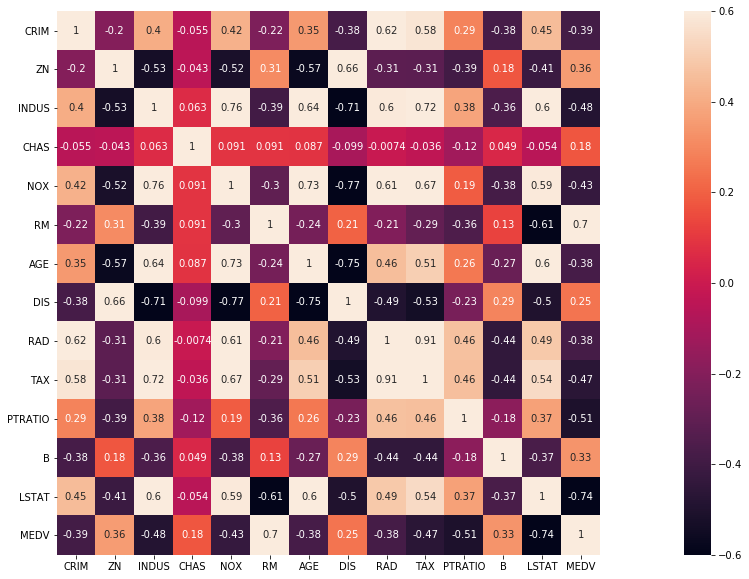

In [156]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), vmax=0.6, vmin=-0.6, square=True, annot=True)
plt.show()